In [1]:
!pip install qiskit
!pip install qiskit-aer
# Deutsch Algorithm using Qiskit 2.x
# Compatible with Qiskit 2.0+ (2024–2025)

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Choose the function type: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for given function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
     # Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
qc.x(1)             # Set output qubit to |1>
qc.barrier()
qc.h([0, 1])        # Apply Hadamard to both qubits

# Step 3: Apply the oracle
qc.barrier()
deutsch_oracle(qc, function_type)
     # Step 4: Apply Hadamard to input qubit
qc.barrier()
qc.h(0)

# Step 5: Measure the first qubit
qc.measure(0, 0)

# Visualize circuit
print(qc.draw(output="text"))
     # Step 6: Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# Interpret result
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.0 MB/s eta 0:00:00
           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 

Measurement results: {'1': 1024}
→ Function is BALANCED.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
=== TASK 1: Custom Oracle f(x) = x XOR 1 ===
Measurement: {'1': 1024}
Detected as: BALANCED


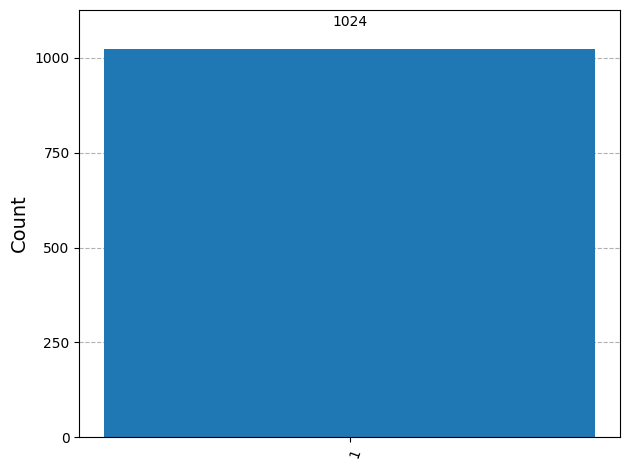


=== TASK 2: Bloch Sphere Visualization ===
Bloch after initial H (qubit 0 & qubit 1):


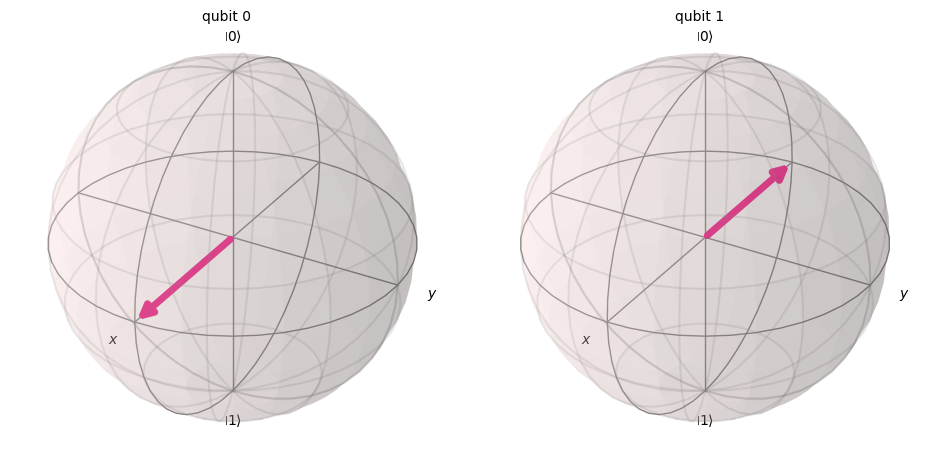

Bloch after oracle (balanced_1) & final H on input:


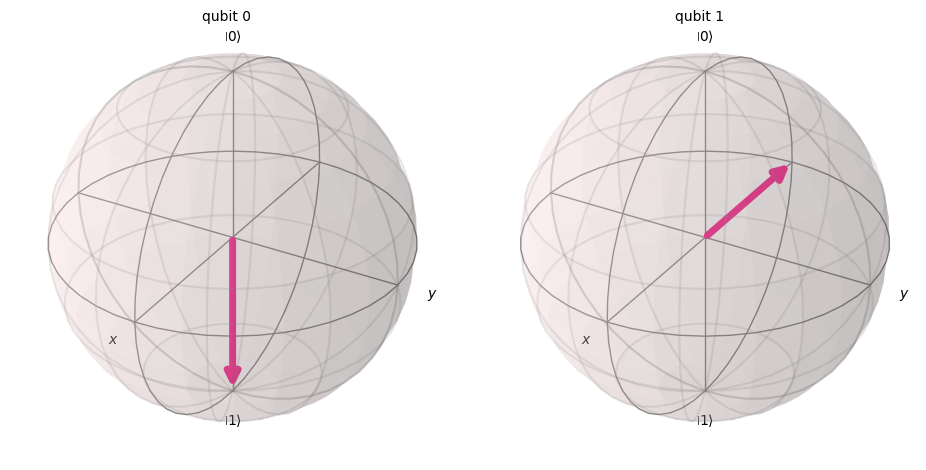


=== TASK 3: Deutsch–Jozsa Extension (2-qubit input) ===
Deutsch-Jozsa (constant_0) counts: {'00': 1024} => CONSTANT


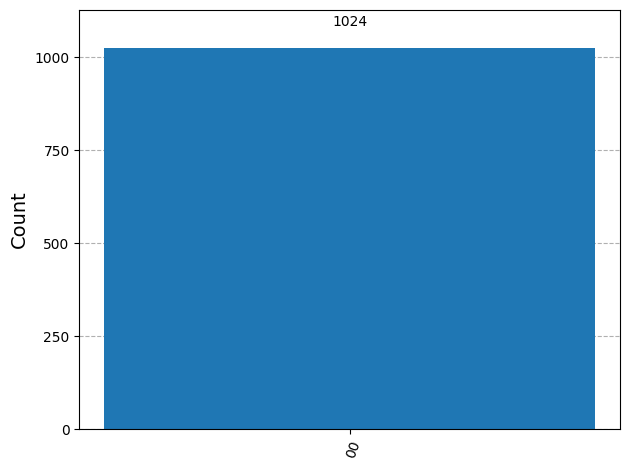

Deutsch-Jozsa (balanced_xor) counts: {'11': 1024} => BALANCED


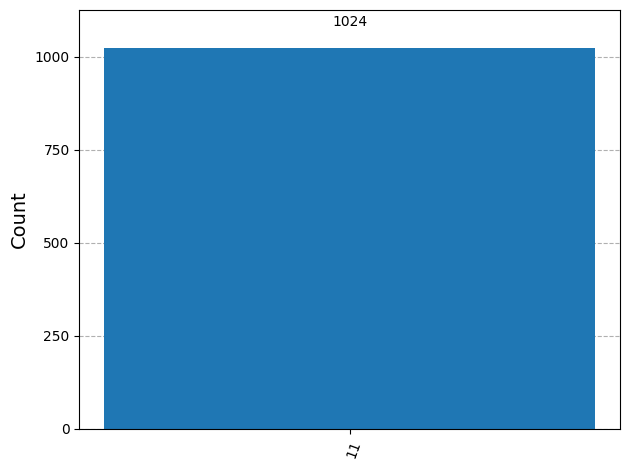


=== TASK 4: Noise Impact ===
Ideal counts: {'1': 1024}


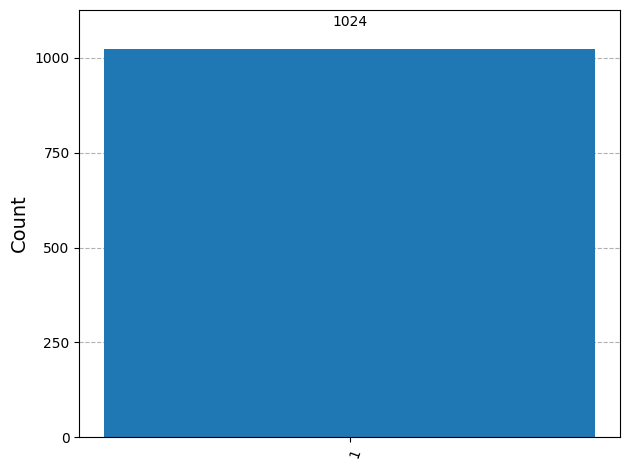

Noisy counts: {'0': 64, '1': 960}


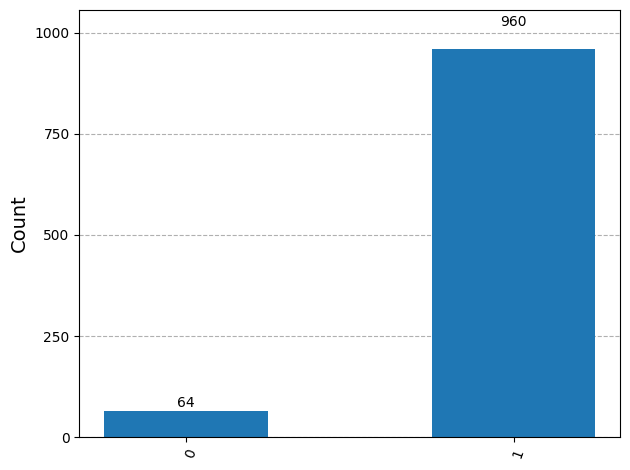


=== TASK 5: Classical vs Quantum Queries ===
constant_0: f(0)=0, f(1)=0 -> Classical label (needs 2 queries worst-case): CONSTANT
constant_1: f(0)=1, f(1)=1 -> Classical label (needs 2 queries worst-case): CONSTANT
balanced_0: f(0)=0, f(1)=1 -> Classical label (needs 2 queries worst-case): BALANCED
balanced_1: f(0)=1, f(1)=0 -> Classical label (needs 2 queries worst-case): BALANCED
Quantum result for constant_0: CONSTANT, counts={'0': 1024}
Quantum result for constant_1: CONSTANT, counts={'0': 1024}
Quantum result for balanced_0: BALANCED, counts={'1': 1024}
Quantum result for balanced_1: BALANCED, counts={'1': 1024}
Quantum result for custom_xor1: BALANCED, counts={'1': 1024}


In [2]:
# ===========================================================
# Deutsch Algorithm + All 5 Tasks — Single runnable cell
# ===========================================================
# Install requirements (run once in the notebook)
!pip install -q qiskit qiskit-aer pylatexenc

# Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt

# Helper: run a circuit and return counts
def run_circuit(qc, shots=1024, noise_model=None):
    sim = AerSimulator()
    compiled = transpile(qc, sim)
    job = sim.run(compiled, shots=shots, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()
    return counts

# -------------------------
# Oracle definition
# -------------------------
def deutsch_oracle(qc: QuantumCircuit, function_type: str) -> QuantumCircuit:
    """
    Apply an oracle for the 1-bit Deutsch functions.
    Qubit 0 -> input x
    Qubit 1 -> output y
    Supported types:
      - 'constant_0' : f(x)=0
      - 'constant_1' : f(x)=1
      - 'balanced_0'  : f(x)=x
      - 'balanced_1'  : f(x)=x XOR 1
      - 'custom_xor1' : custom implementation of x XOR 1 (same as balanced_1 logically)
    """
    if function_type == 'constant_0':
        pass
    elif function_type == 'constant_1':
        qc.x(1)
    elif function_type == 'balanced_0':
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        qc.cx(0, 1)
        qc.x(1)
    elif function_type == 'custom_xor1':
        # One safe implementation: flip input temporarily, CNOT, restore input.
        # This yields f(x) = 1 - x on the target y.
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
    else:
        raise ValueError("Unknown function_type")
    return qc

# -------------------------
# Task: Deutsch circuit builder + runner
# -------------------------
def deutsch_run(function_type: str, shots=1024, noise_model=None, return_state=False):
    """
    Build & run Deutsch circuit for a given function_type.
    Returns (counts, label, optionally statevector)
    """
    qc = QuantumCircuit(2, 1)  # qubit0: input, qubit1: output, 1 classical bit for measured input
    qc.x(1)                    # prepare |y> = |1>
    qc.h([0,1])                # Hadamard on both
    qc = deutsch_oracle(qc, function_type)
    qc.h(0)                    # Hadamard on input qubit
    qc.measure(0, 0)

    # Optionally get statevector before measurement for Bloch plot (we must build a circuit up to that point)
    state = None
    if return_state:
        # Build circuit up to before final H on input (or after Hs/oracle if desired)
        # Here we'll return the full pre-measurement statevector (after qc but before measurement).
        pre_qc = QuantumCircuit(2)
        pre_qc.x(1)
        pre_qc.h([0,1])
        pre_qc = deutsch_oracle(pre_qc, function_type)
        pre_qc.h(0)
        state = Statevector.from_instruction(pre_qc)

    counts = run_circuit(qc, shots=shots, noise_model=noise_model)
    measured = max(counts, key=counts.get)  # most frequent result
    label = "BALANCED" if measured == '1' else "CONSTANT"
    return counts, label, state

# -------------------------
# TASK 1: Custom Oracle f(x) = x XOR 1
# -------------------------
print("=== TASK 1: Custom Oracle f(x) = x XOR 1 ===")
counts_custom, label_custom, _ = deutsch_run('custom_xor1', shots=1024)
print("Measurement:", counts_custom)
print("Detected as:", label_custom)
display(plot_histogram(counts_custom))
plt.show()

# -------------------------
# TASK 2: Bloch Sphere Visualization
# - show Bloch vectors after Hadamard and after Oracle for a chosen oracle
# -------------------------
print("\n=== TASK 2: Bloch Sphere Visualization ===")
# Build circuit up to after initial H on both => state1
qc_stage1 = QuantumCircuit(2)
qc_stage1.x(1)
qc_stage1.h([0,1])
state_after_h = Statevector.from_instruction(qc_stage1)
print("Bloch after initial H (qubit 0 & qubit 1):")
display(plot_bloch_multivector(state_after_h))
plt.show()

# Now after oracle (choose balanced_1 for visible phase flip)
qc_stage2 = QuantumCircuit(2)
qc_stage2.x(1)
qc_stage2.h([0,1])
qc_stage2 = deutsch_oracle(qc_stage2, 'balanced_1')
qc_stage2.h(0)
state_after_oracle = Statevector.from_instruction(qc_stage2)
print("Bloch after oracle (balanced_1) & final H on input:")
display(plot_bloch_multivector(state_after_oracle))
plt.show()

# -------------------------
# TASK 3: Deutsch-Jozsa Extension (2-qubit input)
# -------------------------
print("\n=== TASK 3: Deutsch–Jozsa Extension (2-qubit input) ===")
def deutsch_jozsa_2qubit(oracle_type: str, shots=1024):
    """
    2-qubit input Deutsch-Jozsa:
    - input register: qubits 0 and 1
    - output qubit: qubit 2 (ancilla)
    Supported oracle_type:
      - 'constant_0', 'constant_1', 'balanced_xor' (f(x0,x1) = x0 XOR x1)
    """
    qc = QuantumCircuit(3, 2)
    qc.x(2)                # prepare ancilla in |1>
    qc.h([0,1,2])          # hadamards on all
    if oracle_type == 'constant_0':
        pass
    elif oracle_type == 'constant_1':
        qc.x(2)
    elif oracle_type == 'balanced_xor':
        qc.cx(0, 2)
        qc.cx(1, 2)
    else:
        raise ValueError("Unknown oracle_type")
    qc.h([0,1])            # Hadamard on input register
    qc.measure([0,1],[0,1])
    counts = run_circuit(qc, shots=shots)
    measured = max(counts, key=counts.get)
    label = "CONSTANT" if measured == '00' else "BALANCED"
    return counts, label

# Run examples
counts_dj_const, label_dj_const = deutsch_jozsa_2qubit('constant_0')
print("Deutsch-Jozsa (constant_0) counts:", counts_dj_const, "=>", label_dj_const)
display(plot_histogram(counts_dj_const)); plt.show()

counts_dj_bal, label_dj_bal = deutsch_jozsa_2qubit('balanced_xor')
print("Deutsch-Jozsa (balanced_xor) counts:", counts_dj_bal, "=>", label_dj_bal)
display(plot_histogram(counts_dj_bal)); plt.show()

# -------------------------
# TASK 4: Noise Impact
# -------------------------
print("\n=== TASK 4: Noise Impact ===")
# Build a small depolarizing noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 2), ['cx'])

# Create a balanced_0 circuit (one we know should yield '1')
qc_noisy = QuantumCircuit(2,1)
qc_noisy.x(1)
qc_noisy.h([0,1])
qc_noisy = deutsch_oracle(qc_noisy, 'balanced_0')
qc_noisy.h(0)
qc_noisy.measure(0,0)

# Run ideal (no noise) and noisy versions
counts_ideal = run_circuit(qc_noisy, shots=1024, noise_model=None)
counts_noisy = run_circuit(qc_noisy, shots=1024, noise_model=noise_model)
print("Ideal counts:", counts_ideal)
display(plot_histogram(counts_ideal)); plt.show()
print("Noisy counts:", counts_noisy)
display(plot_histogram(counts_noisy)); plt.show()

# -------------------------
# TASK 5: Classical vs Quantum Queries
# -------------------------
print("\n=== TASK 5: Classical vs Quantum Queries ===")
def classical_evaluator(f, x):
    return f(x)

# Define example functions for testing
def f_constant_0(x): return 0
def f_constant_1(x): return 1
def f_balanced_x(x): return x
def f_balanced_xxor1(x): return 1 - x  # x XOR 1

# Show classical queries for each
for name, f in [('constant_0', f_constant_0),
                ('constant_1', f_constant_1),
                ('balanced_0', f_balanced_x),
                ('balanced_1', f_balanced_xxor1)]:
    out0 = classical_evaluator(f, 0)
    out1 = classical_evaluator(f, 1)
    classical_label = "CONSTANT" if out0 == out1 else "BALANCED"
    print(f"{name}: f(0)={out0}, f(1)={out1} -> Classical label (needs 2 queries worst-case): {classical_label}")

# Compare with Deutsch quantum results (1 query)
for ft in ['constant_0','constant_1','balanced_0','balanced_1','custom_xor1']:
    counts, label, _ = deutsch_run(ft)
    print(f"Quantum result for {ft}: {label}, counts={counts}")
